In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

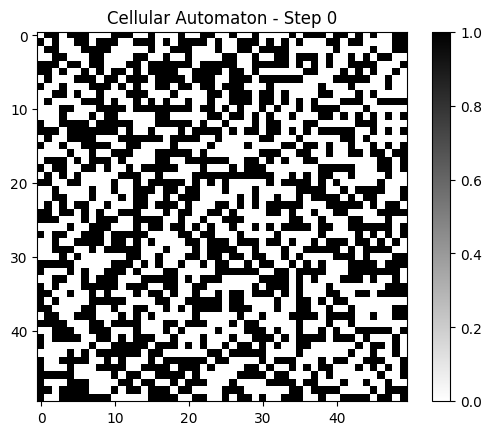

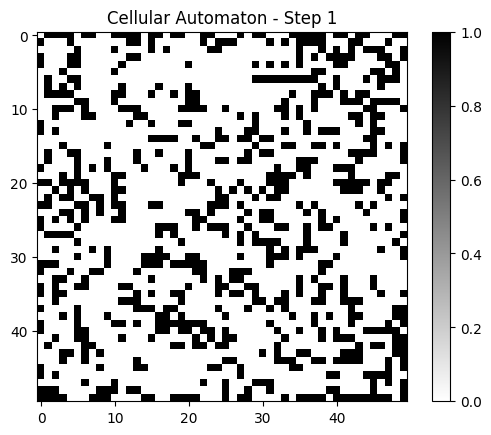

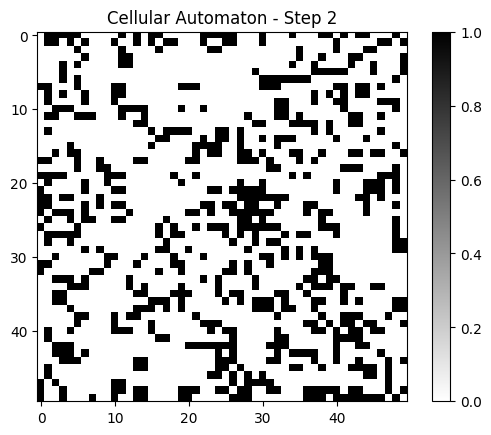

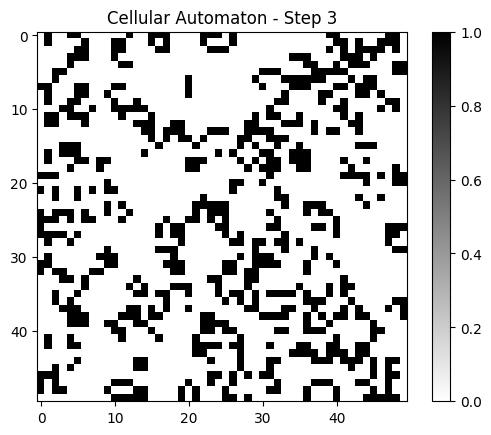

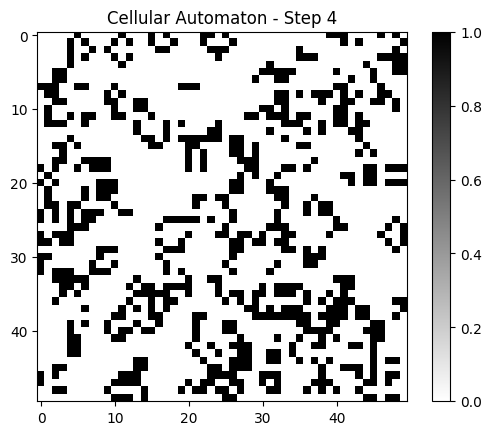

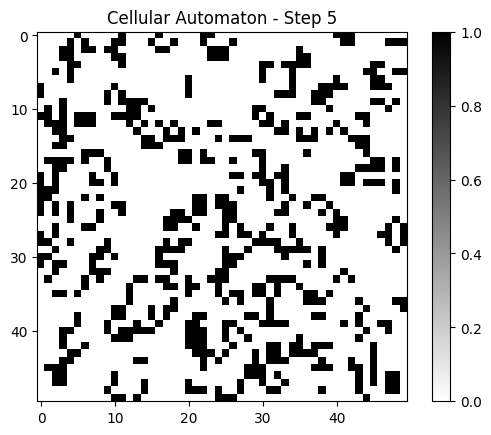

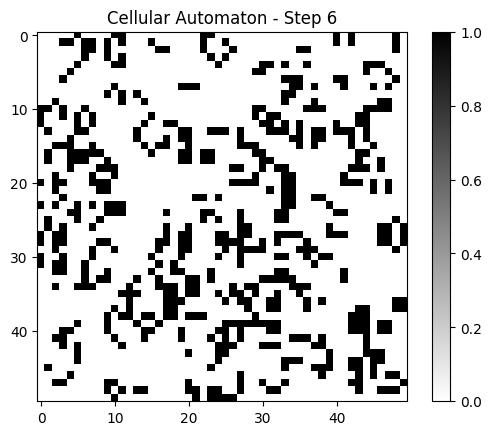

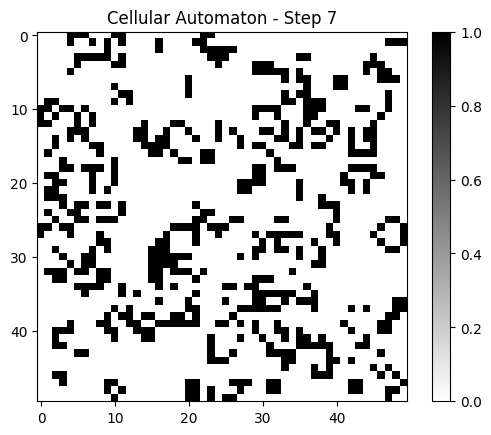

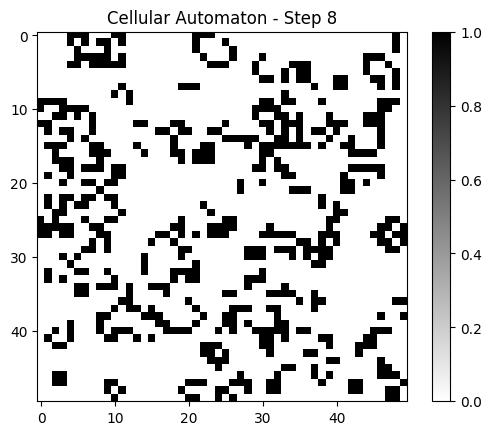

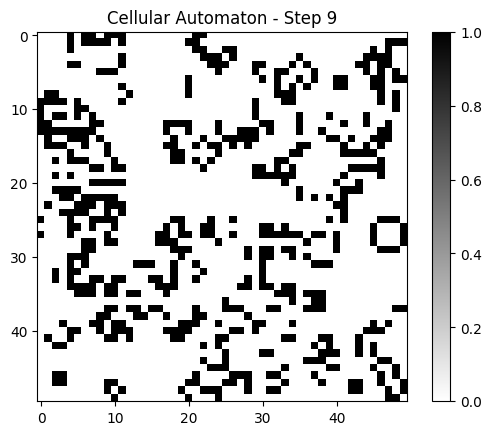

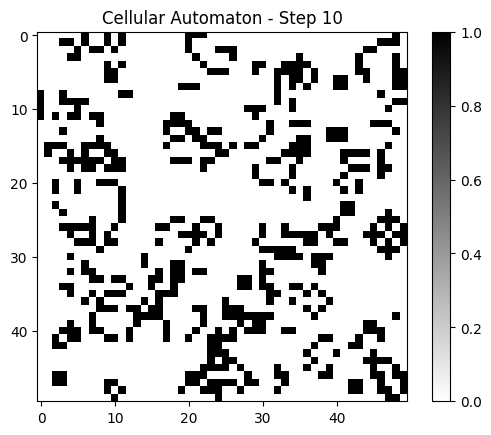

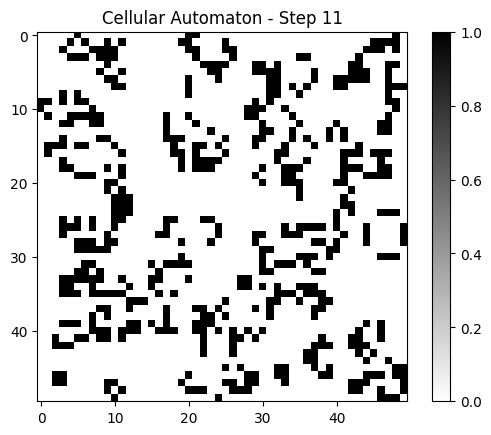

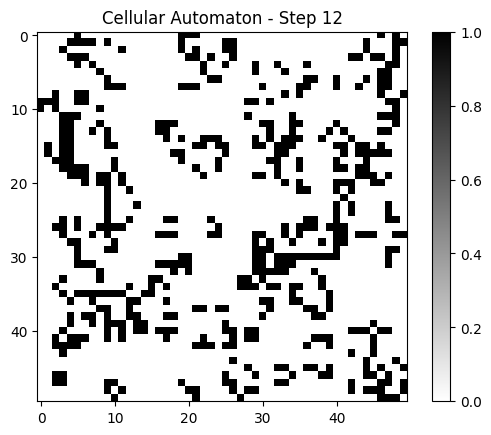

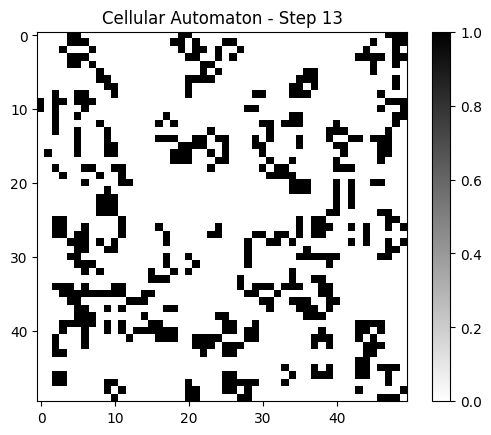

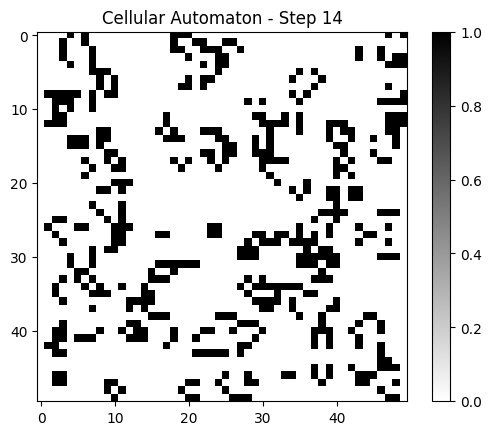

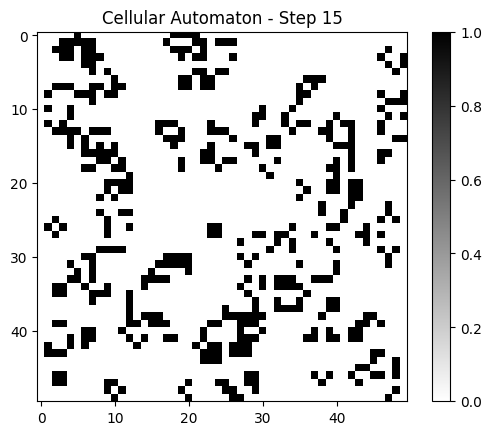

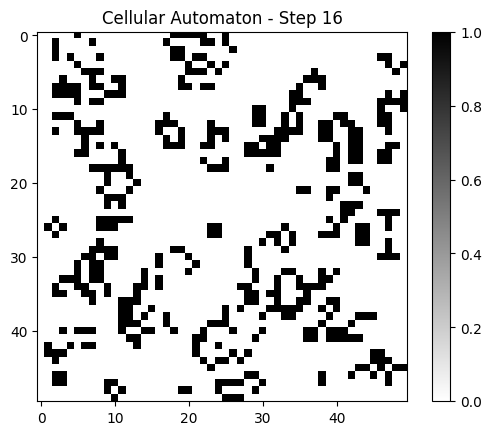

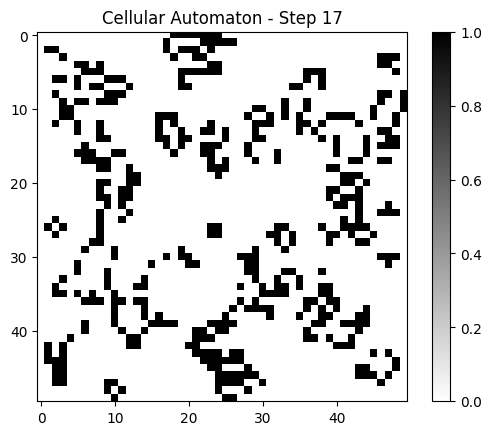

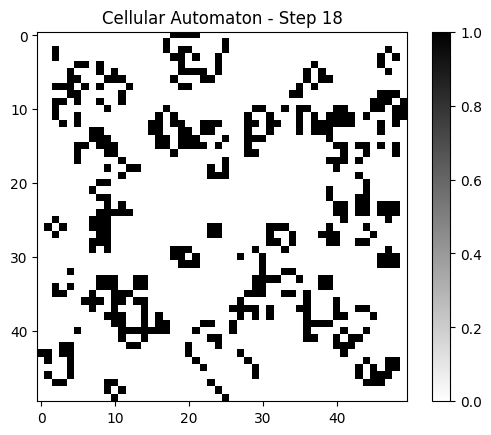

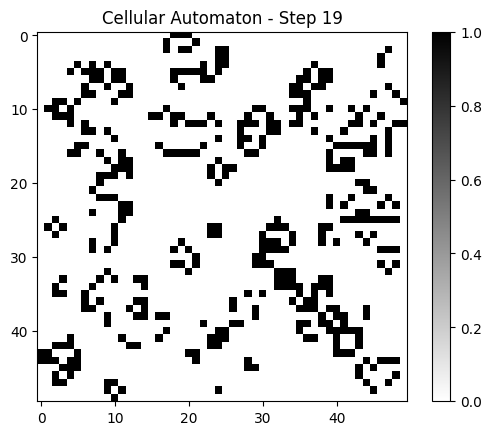

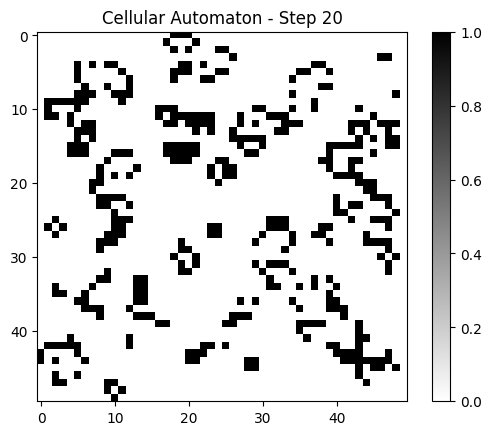

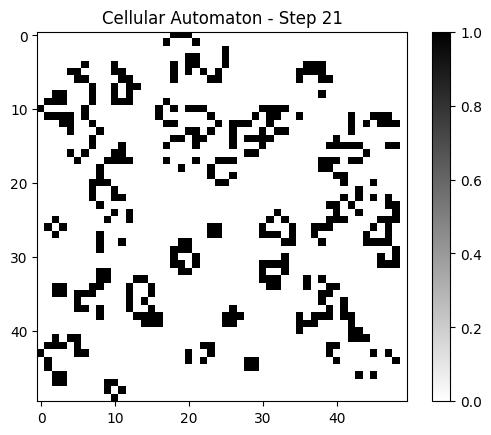

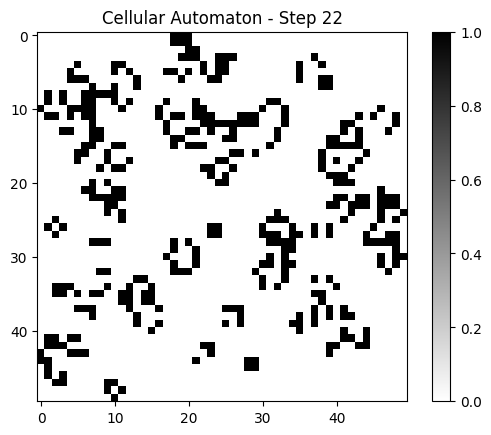

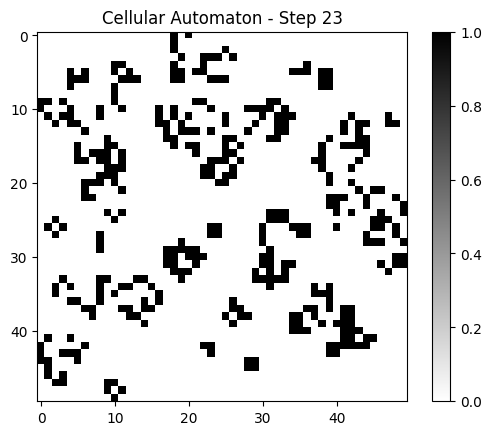

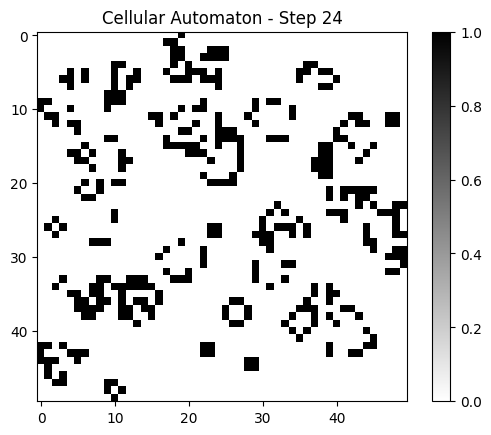

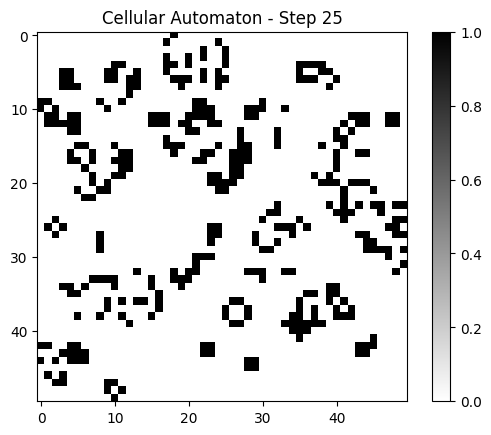

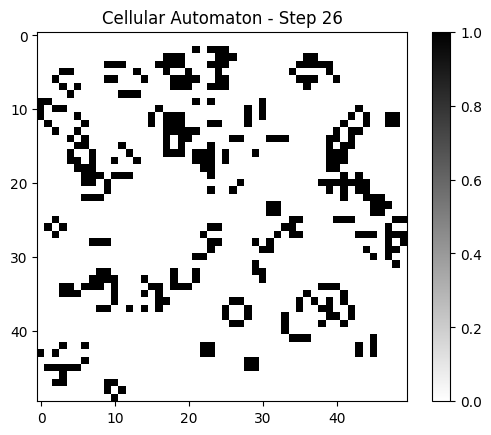

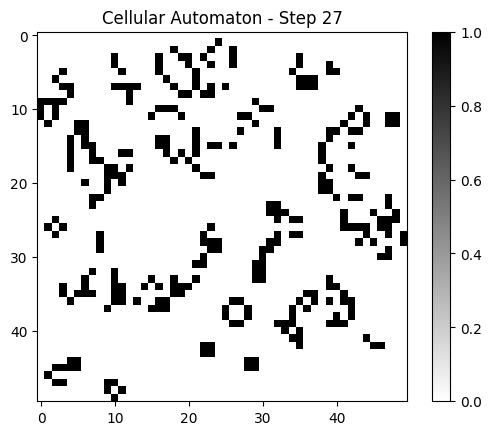

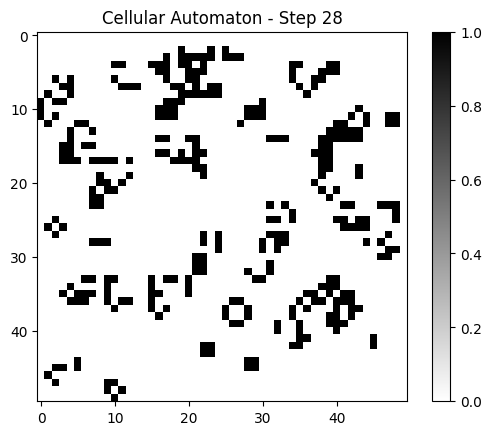

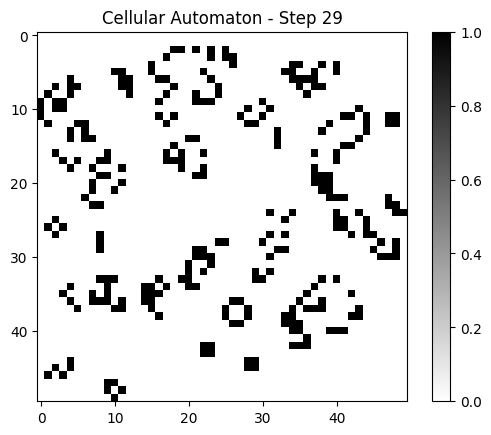

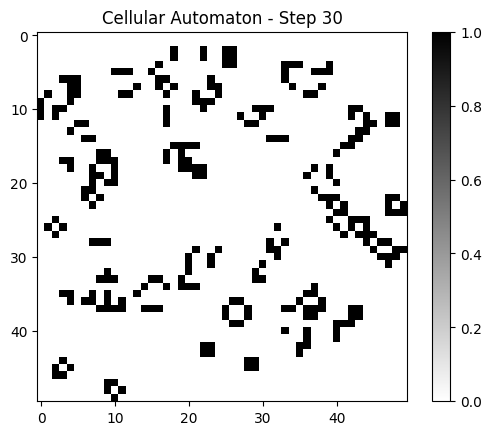

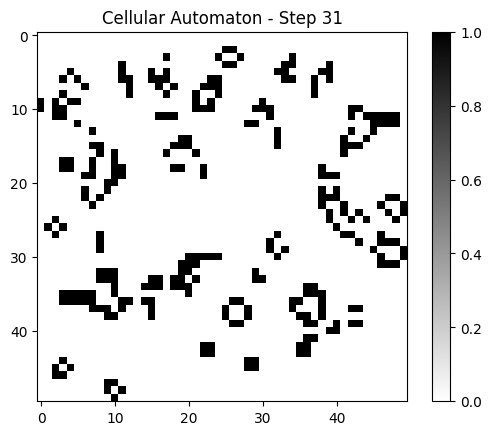

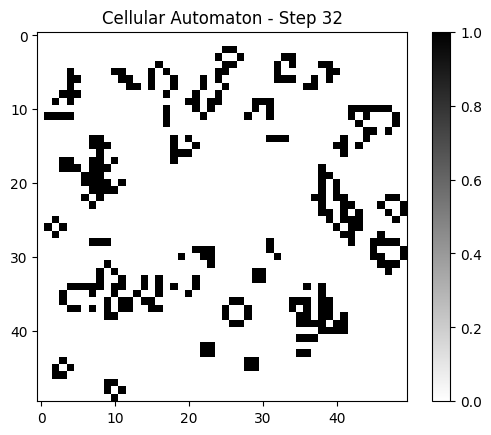

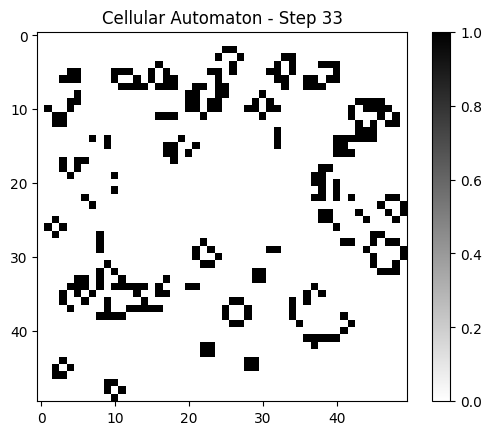

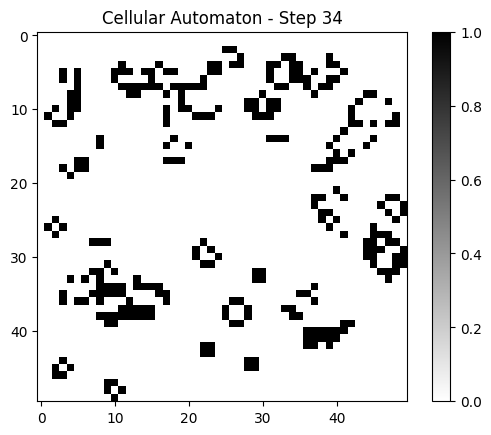

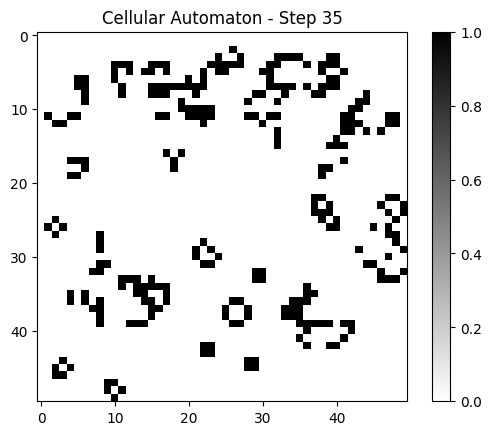

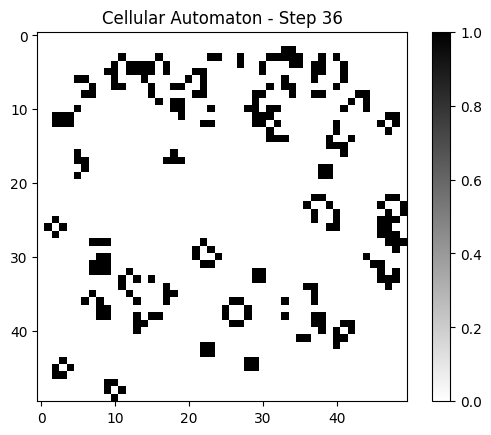

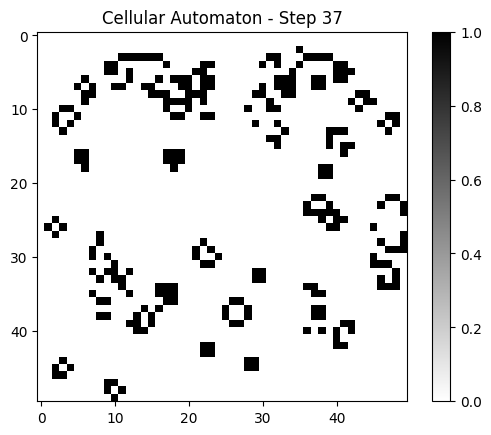

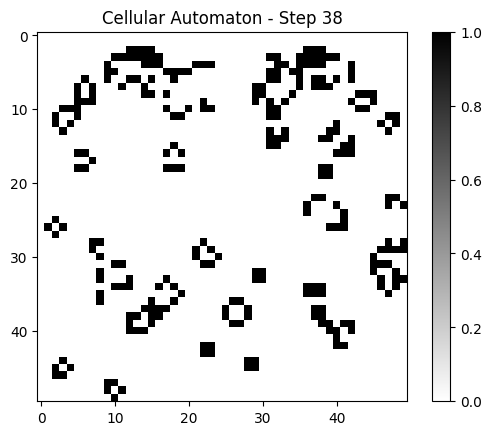

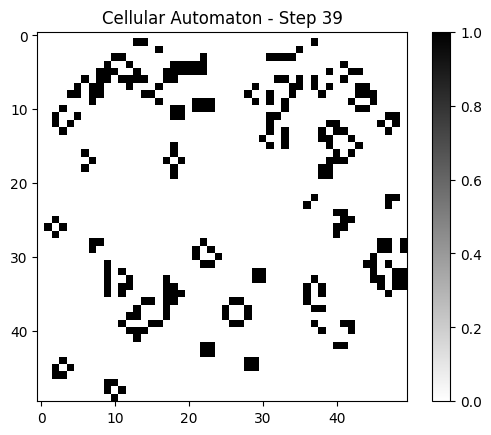

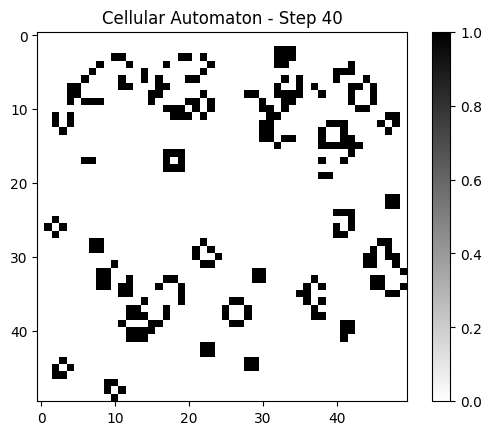

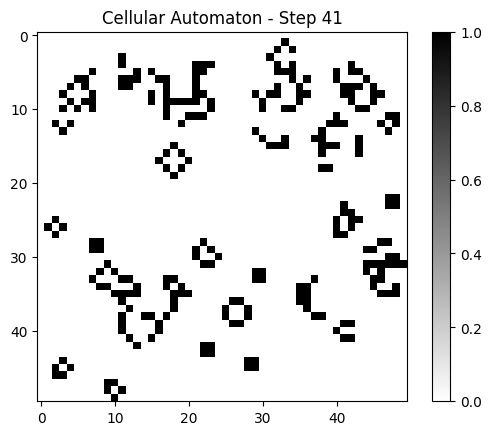

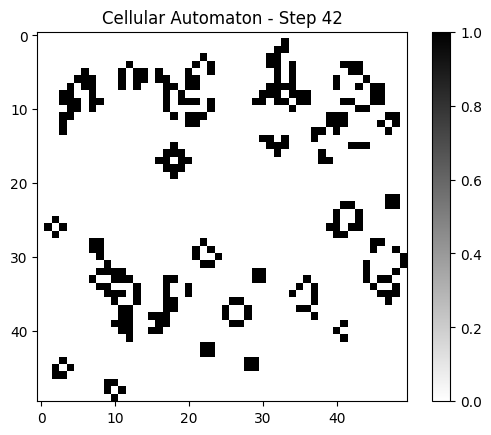

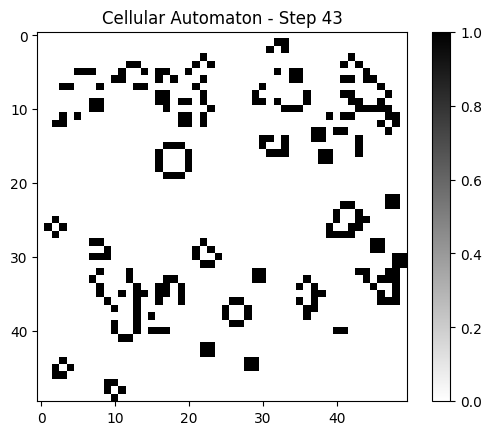

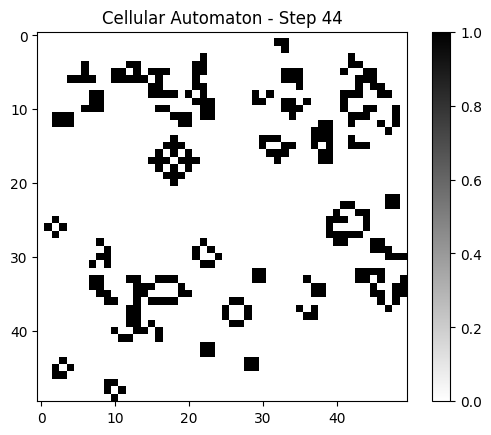

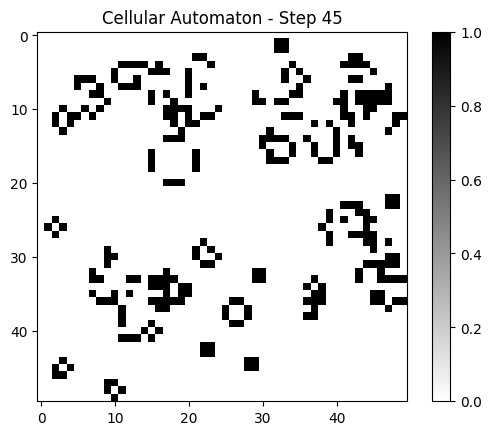

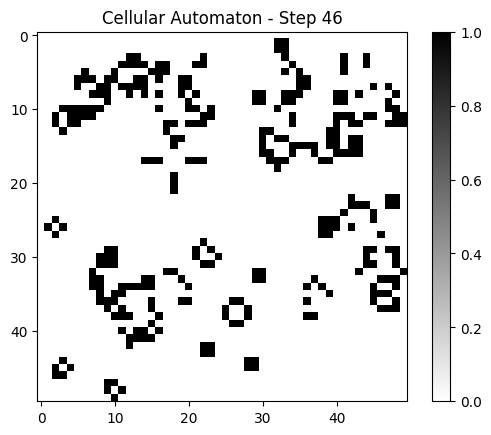

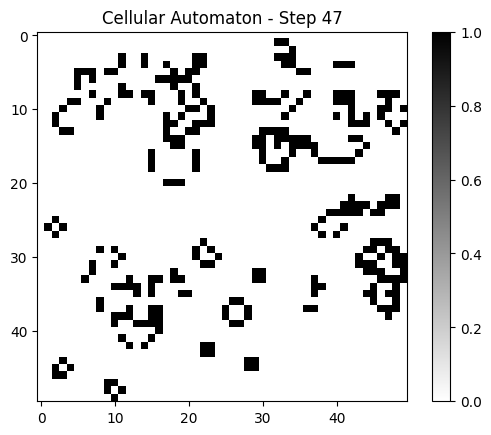

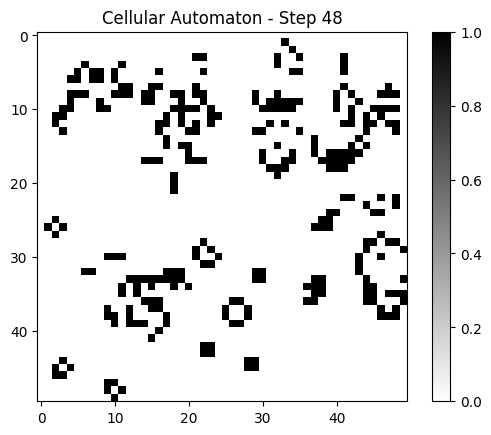

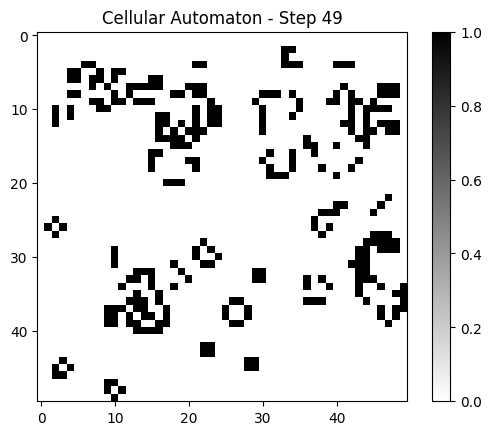

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(width, height):
    """ Initialize the grid with random states (0 or 1). """
    return np.random.choice([0, 1], size=(height, width))

def count_neighbors(grid, x, y):
    """ Count the number of active (1) neighbors around cell (x, y). """
    height, width = grid.shape
    count = 0
    for dy in [-1, 0, 1]:
        for dx in [-1, 0, 1]:
            if dy == 0 and dx == 0:
                continue
            ny, nx = y + dy, x + dx
            if 0 <= ny < height and 0 <= nx < width:
                count += grid[ny, nx]
    return count

def update_grid(grid):
    """ Update the grid based on the rules. """
    height, width = grid.shape
    new_grid = grid.copy()
    for y in range(height):
        for x in range(width):
            active_neighbors = count_neighbors(grid, x, y)
            if grid[y, x] == 1:
                # Cell remains active if it has 2 or 3 active neighbors
                new_grid[y, x] = 1 if active_neighbors in [2, 3] else 0
            else:
                # Cell becomes active if it has exactly 3 active neighbors
                new_grid[y, x] = 1 if active_neighbors == 3 else 0
    return new_grid

def visualize_grid(grid, step):
    """ Visualize the grid using Matplotlib. """
    plt.imshow(grid, cmap='binary', interpolation='nearest')
    plt.title(f'Cellular Automaton - Step {step}')
    plt.colorbar()
    plt.pause(0.1)

def cellular_automaton_simulation(width, height, num_steps):
    """ Run the cellular automaton simulation for a given number of steps. """
    grid = initialize_grid(width, height)
    
    plt.figure()
    for step in range(num_steps):
        visualize_grid(grid, step)
        grid = update_grid(grid)
    
    plt.show()

# Example usage
width, height = 50, 50
num_steps = 50

cellular_automaton_simulation(width, height, num_steps)


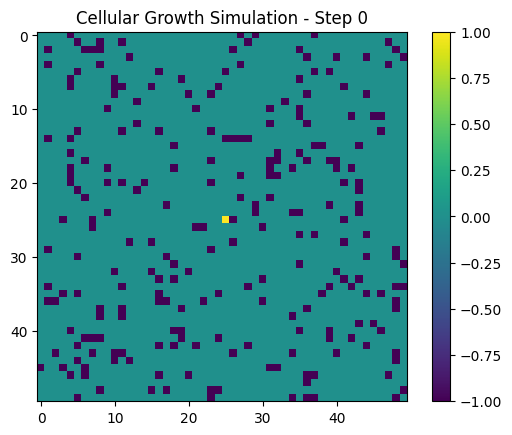

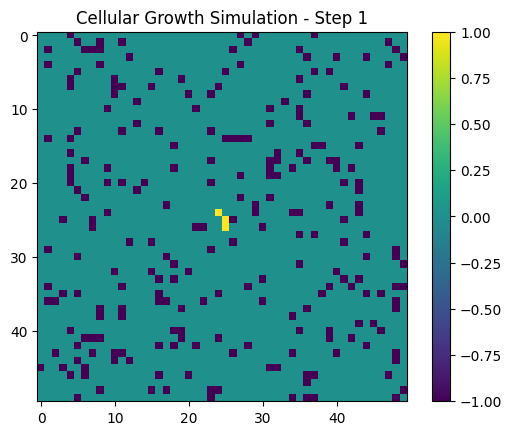

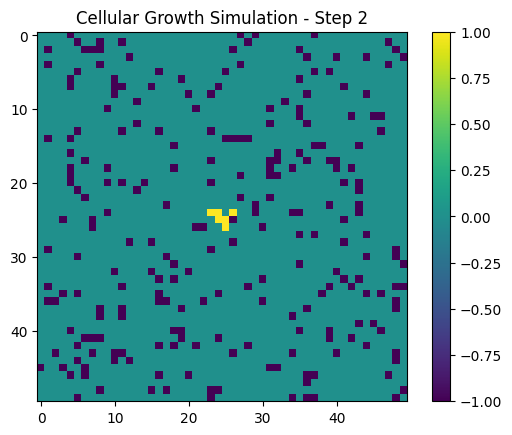

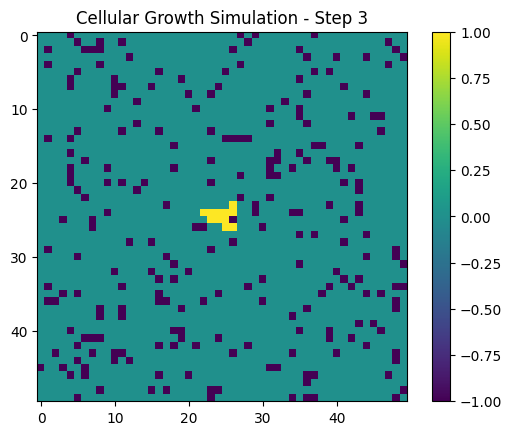

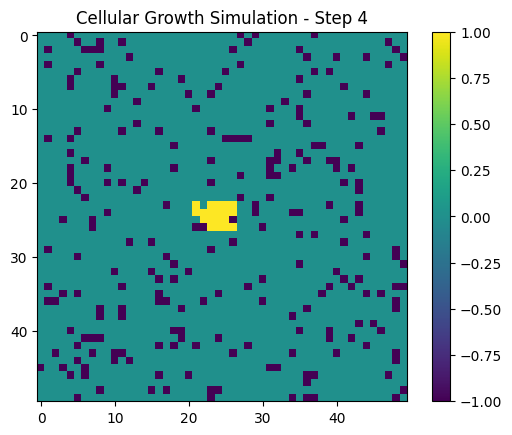

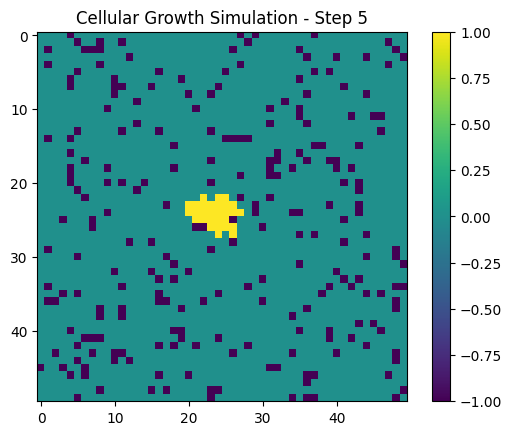

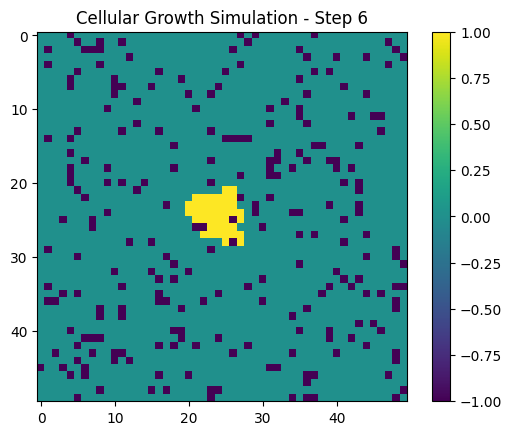

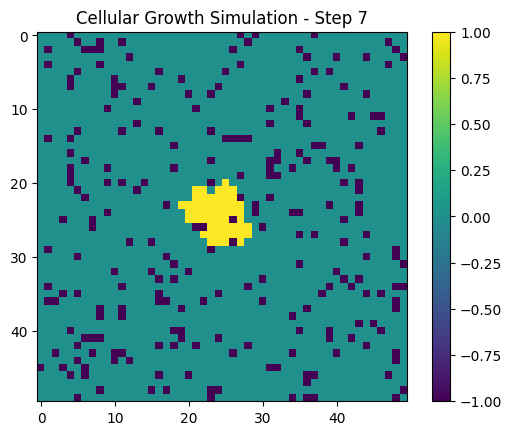

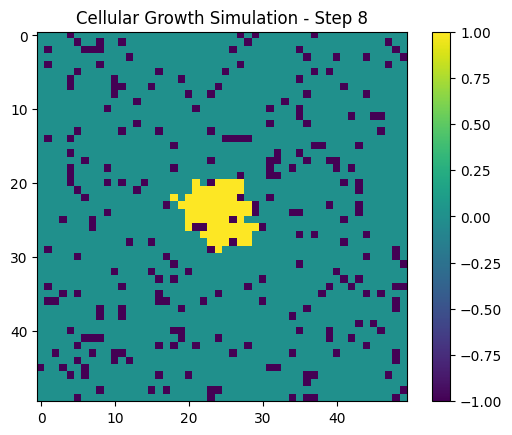

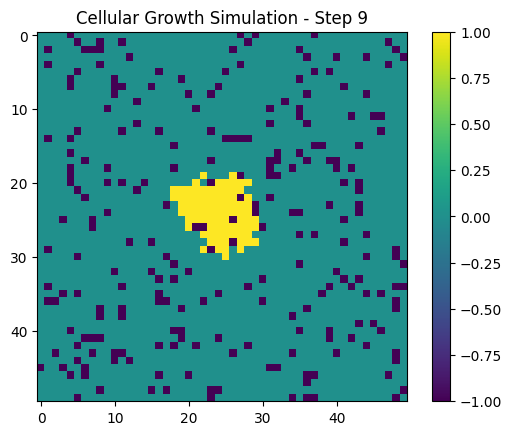

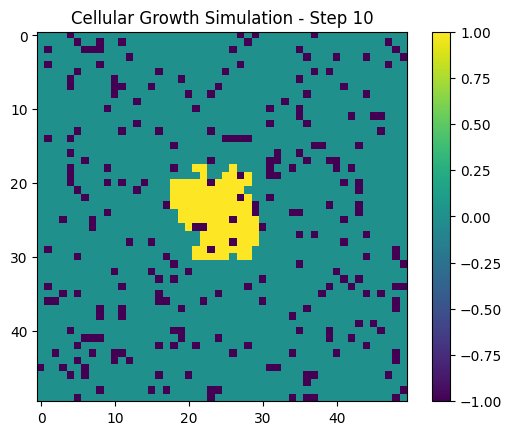

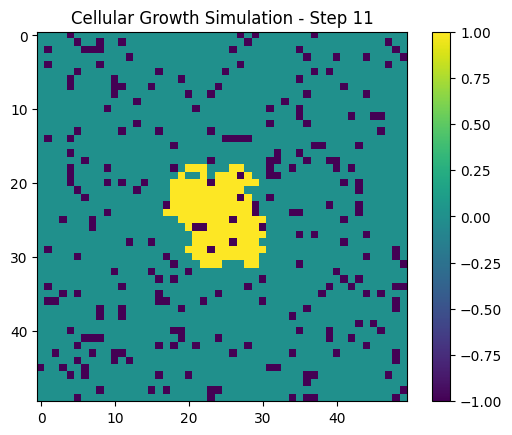

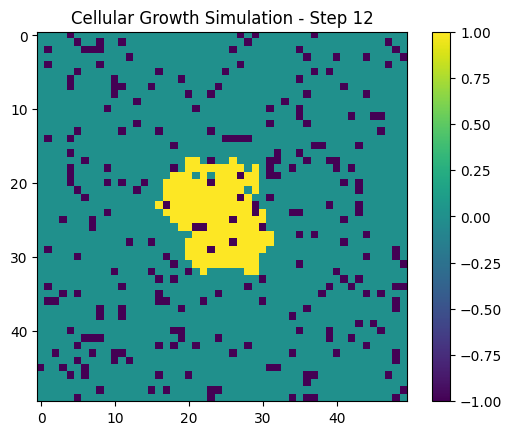

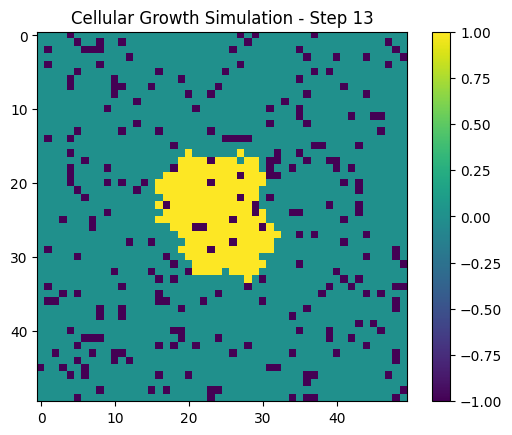

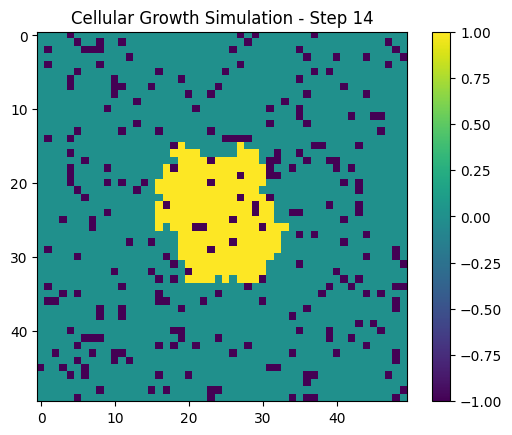

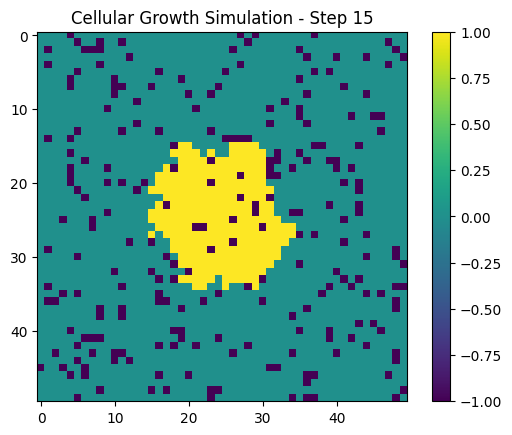

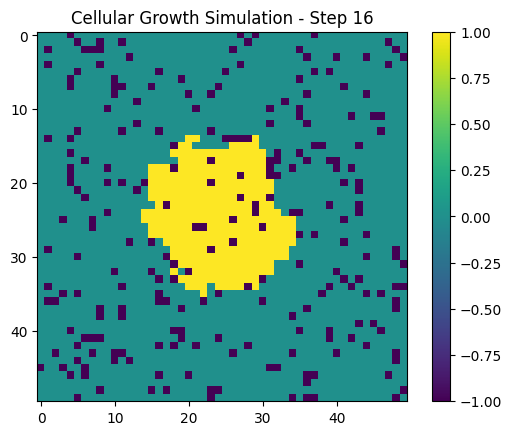

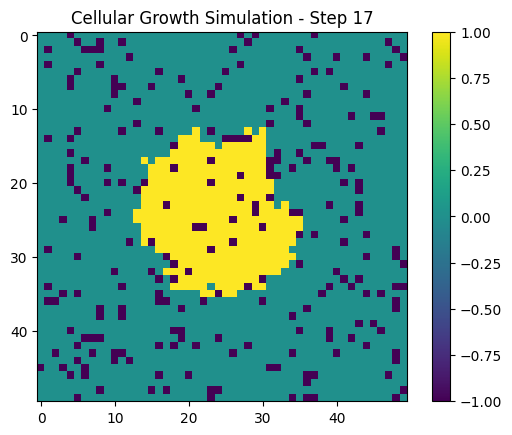

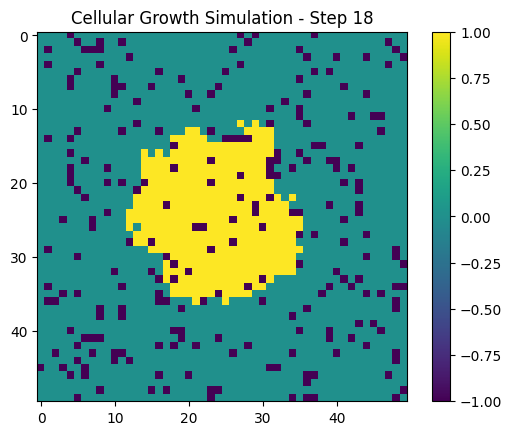

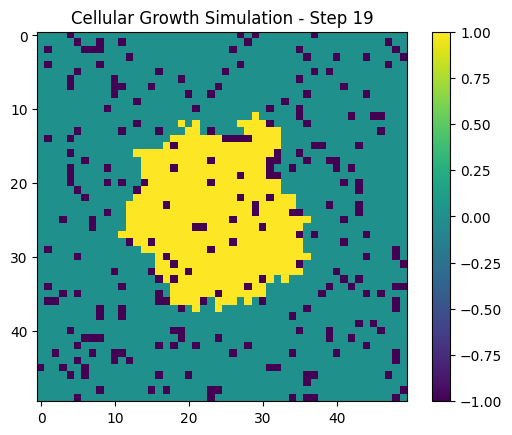

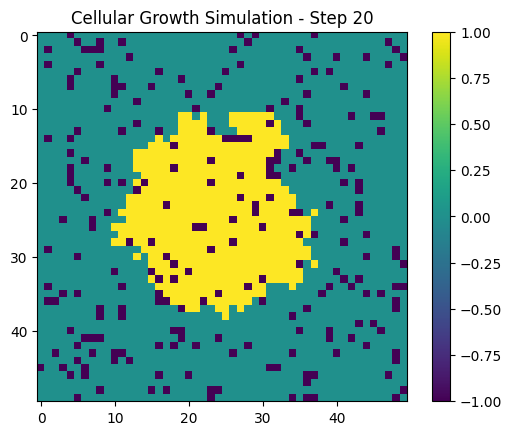

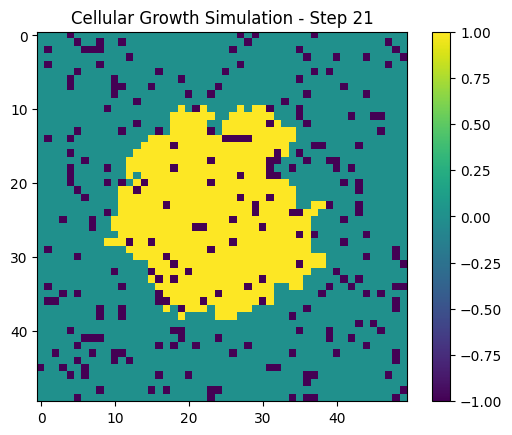

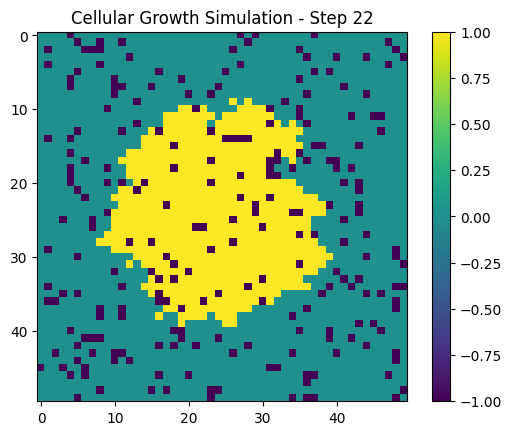

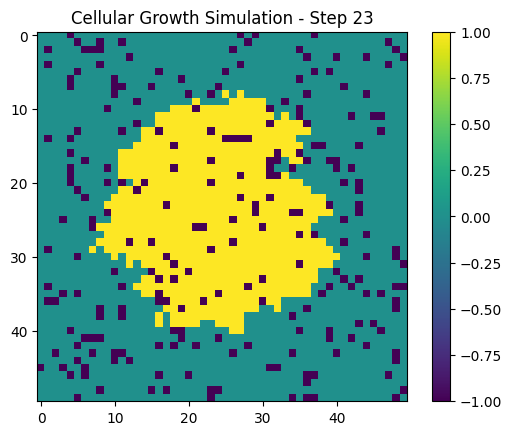

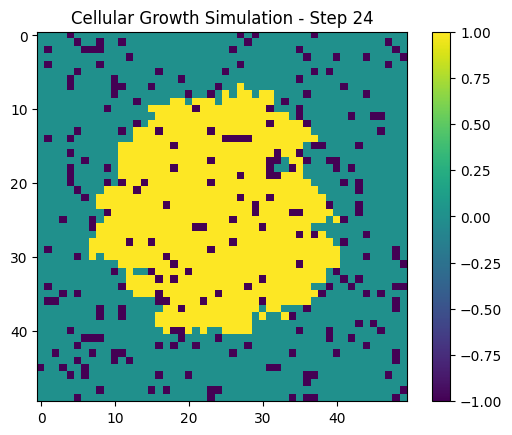

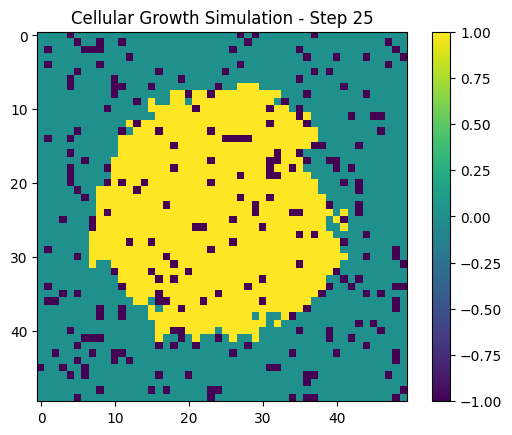

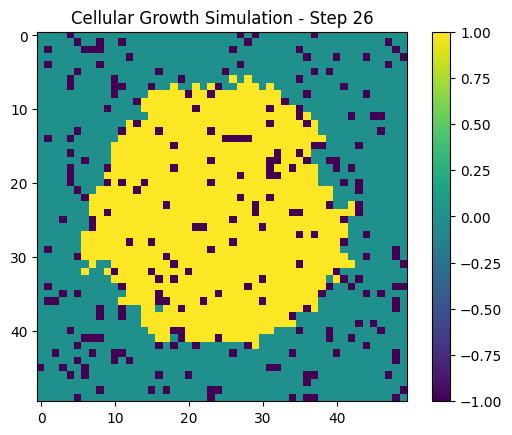

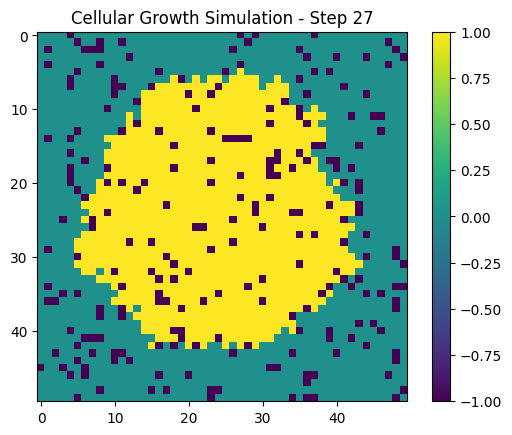

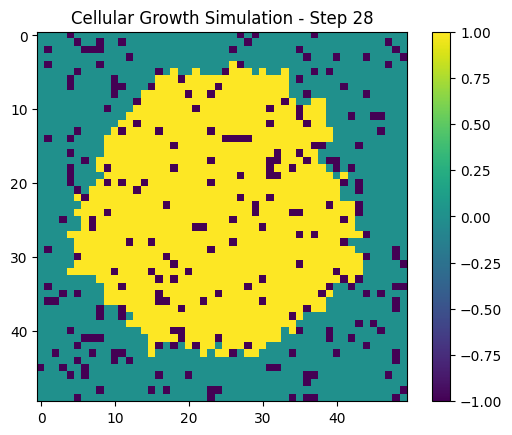

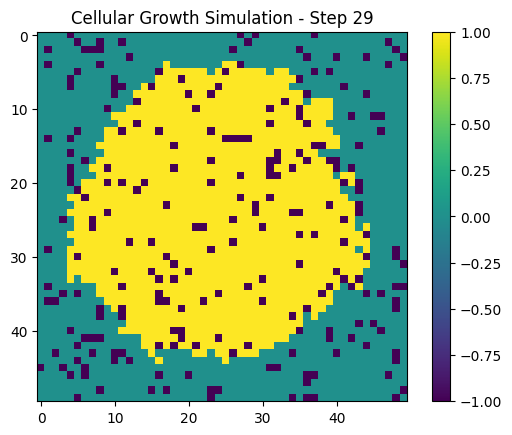

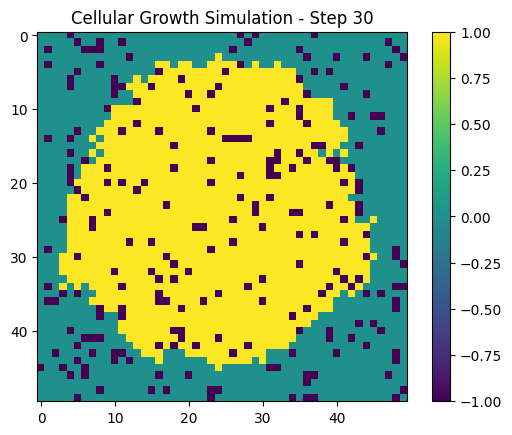

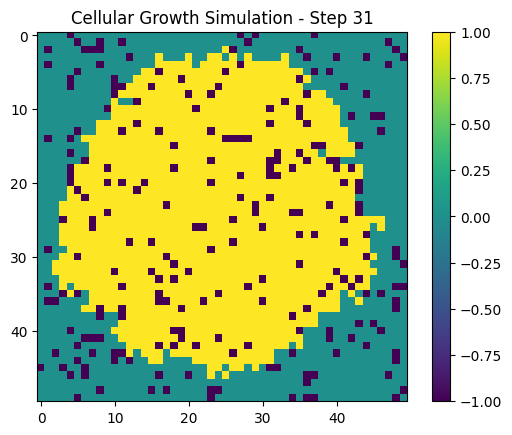

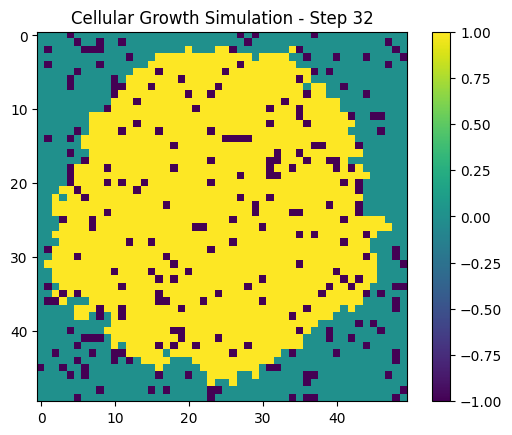

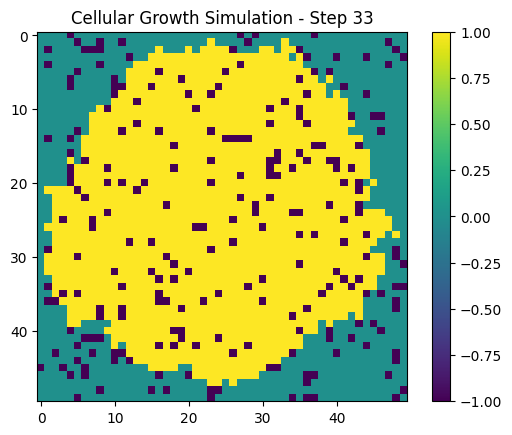

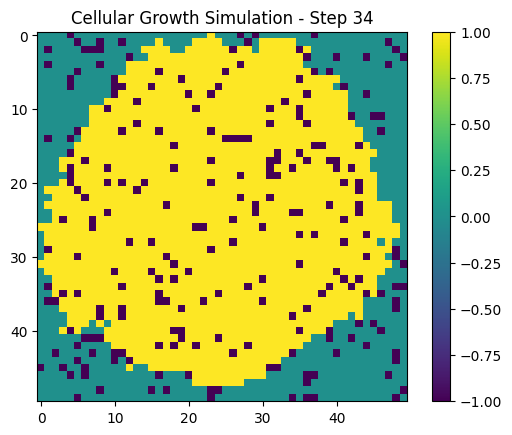

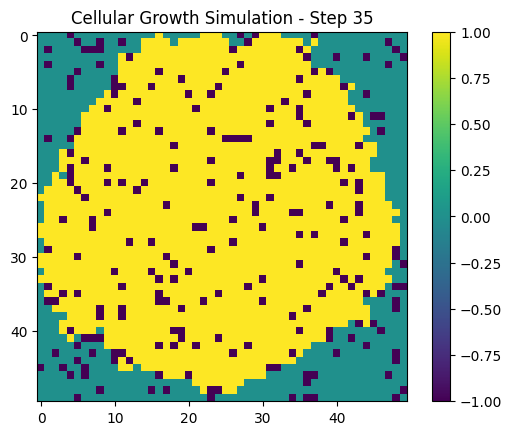

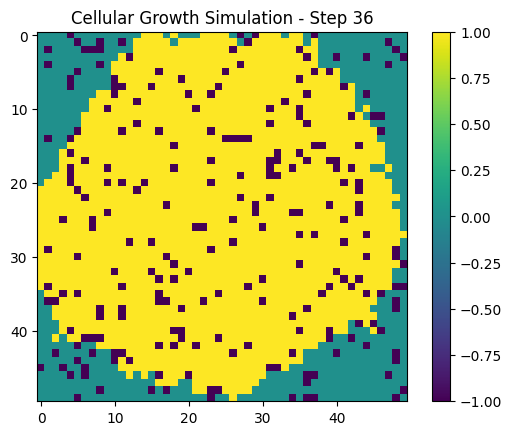

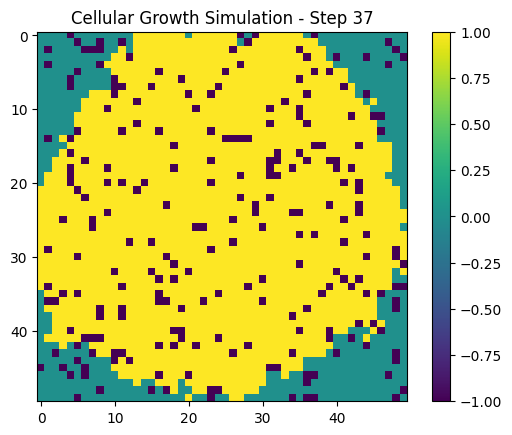

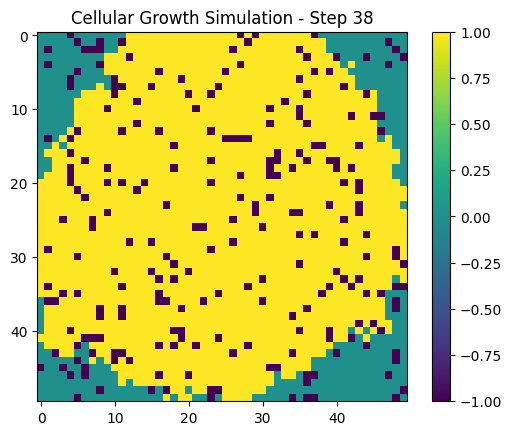

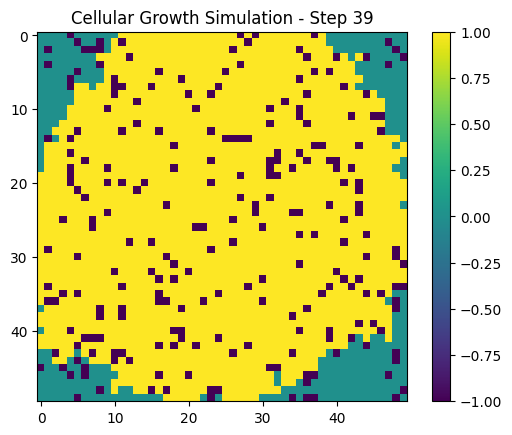

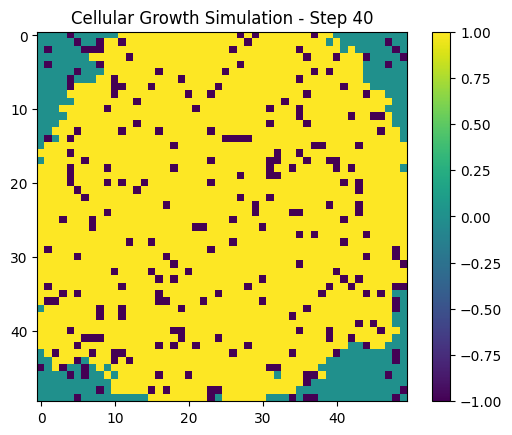

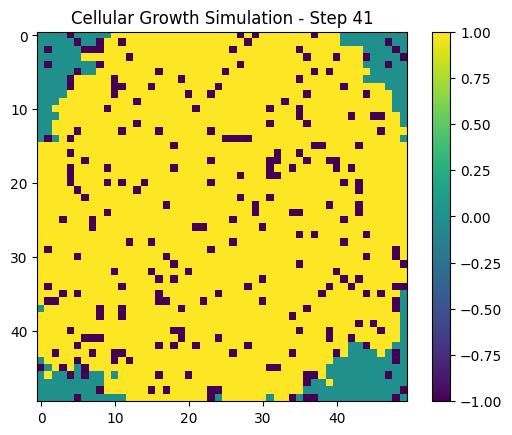

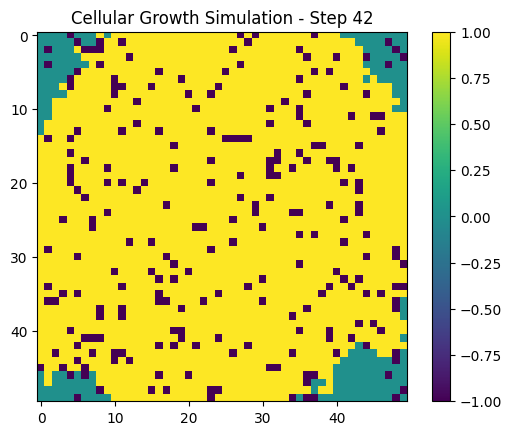

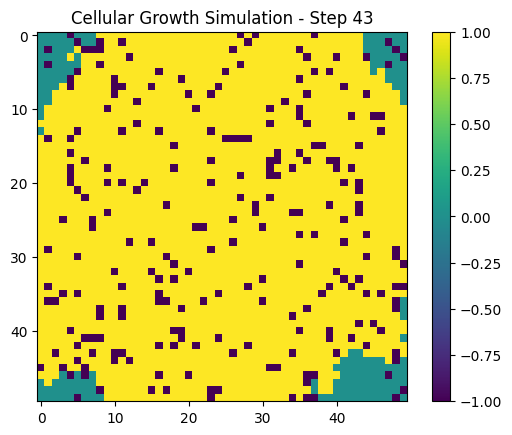

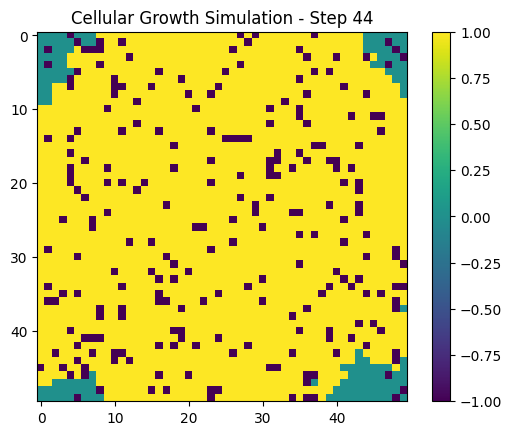

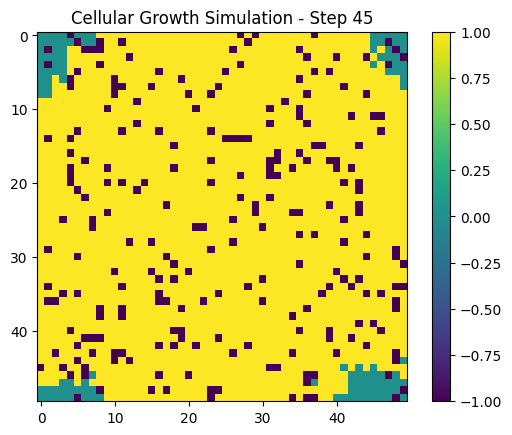

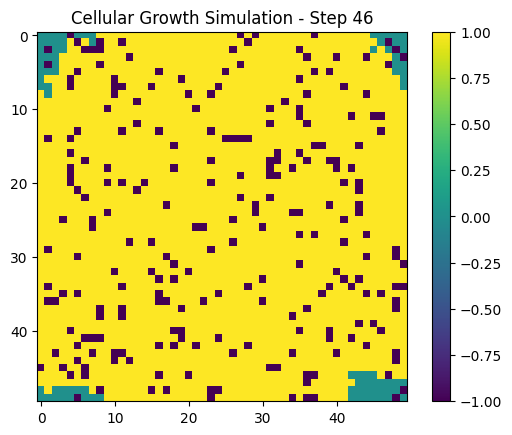

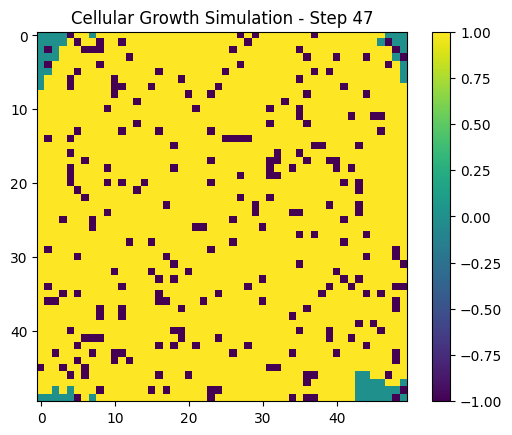

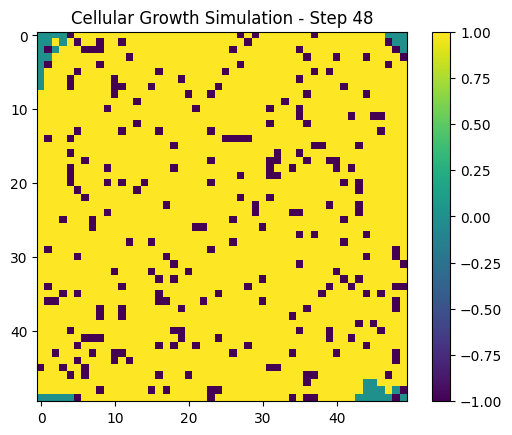

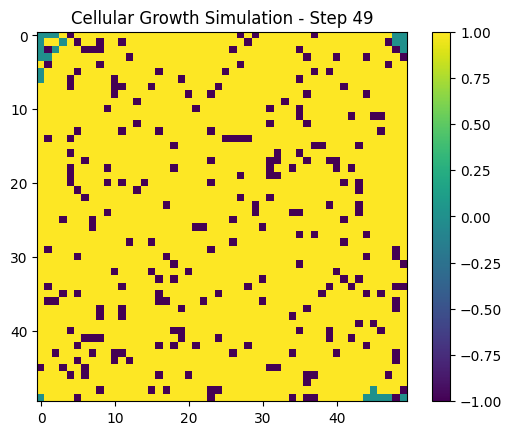

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(width, height, start_x, start_y, suitability_prob=0.1):
    """ Initialize the grid with a single healthy cell and some cells that are not suitable for growth. """
    grid = np.zeros((height, width), dtype=int)
    grid[start_y, start_x] = 1  # Single healthy cell
    
    # Randomly assign some cells as not suitable for growth
    suitability = np.random.choice([0, -1], size=(height, width), p=[1 - suitability_prob, suitability_prob])
    
    # Combine with the grid
    grid = np.where(grid == 1, 1, suitability)
    return grid

def count_neighbors(grid, x, y):
    """ Count the number of healthy (1) neighbors around cell (x, y). """
    height, width = grid.shape
    count = 0
    for dy in [-1, 0, 1]:
        for dx in [-1, 0, 1]:
            if dy == 0 and dx == 0:
                continue
            ny, nx = y + dy, x + dx
            if 0 <= ny < height and 0 <= nx < width:
                if grid[ny, nx] == 1:
                    count += 1
    return count

def update_grid(grid, growth_threshold=3, growth_prob=0.2):
    """ Update the grid based on cellular growth rules, considering cells that are not suitable for growth. """
    height, width = grid.shape
    new_grid = grid.copy()
    
    for y in range(height):
        for x in range(width):
            healthy_neighbors = count_neighbors(grid, x, y)
            
            # Healthy cell growth
            if grid[y, x] == 1:
                for dy in [-1, 0, 1]:
                    for dx in [-1, 0, 1]:
                        if dy == 0 and dx == 0:
                            continue
                        ny, nx = y + dy, x + dx
                        if 0 <= ny < height and 0 <= nx < width:
                            if grid[ny, nx] == 0 and np.random.rand() < growth_prob:
                                new_grid[ny, nx] = 1
            
            # Dead cell activation
            if grid[y, x] == 0 and healthy_neighbors >= growth_threshold:
                if np.random.rand() < 0.5:  # Added probability to consider growth into suitable cells
                    new_grid[y, x] = 1

    return new_grid

def visualize_grid(grid, step):
    """ Visualize the grid using Matplotlib. """
    plt.imshow(grid, cmap='viridis', interpolation='nearest', vmin=-1, vmax=1)
    plt.title(f'Cellular Growth Simulation - Step {step}')
    plt.colorbar()
    plt.pause(0.1)

def cellular_growth_simulation(width, height, num_steps, start_x, start_y, suitability_prob=0.1, growth_threshold=3, growth_prob=0.2):
    """ Run the cellular growth simulation for a given number of steps starting from a single cell. """
    grid = initialize_grid(width, height, start_x, start_y, suitability_prob)
    
    plt.figure()
    for step in range(num_steps):
        visualize_grid(grid, step)
        grid = update_grid(grid, growth_threshold, growth_prob)
    
    plt.show()

# Example usage
width, height = 50, 50
num_steps = 50
start_x, start_y = width // 2, height // 2  # Start in the center of the grid
suitability_prob = 0.1  # Probability of a cell being not suitable for growth
growth_threshold = 3
growth_prob = 0.2

cellular_growth_simulation(width, height, num_steps, start_x, start_y, suitability_prob, growth_threshold, growth_prob)

## Research
- https://www.mdpi.com/2071-1050/13/9/4897#:~:text=In%20the%20FDS%2C%20the%20physical,HRR%20and%20fire%20spread%20characteristics.
- https://isprs-archives.copernicus.org/articles/XLII-4-W19/319/2019/